In [19]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

from dotenv import load_dotenv
load_dotenv()

import os
data_path = os.getenv('DATA_PATH')
result_path = os.getenv('RESULT_PATH')
root = os.getenv('ROOT')

os.chdir(root)
os.getcwd()

'/disks/qnap3/users/23-miura/coauth-interest'

In [41]:
p = 0.98
first_task_length = 5

int_tasks = []
def updatetask(agent):
    l = max(agent.index.values)+1
    agent["interval"] += 1
    newline = {"priority":random.random(),\
                "tasks":(random.random()<=p_interactive_task),\
                "interval":0}
    return pd.concat([agent, pd.DataFrame(newline,index=[l]) ])

for k in range(1):
  agent = pd.DataFrame({"priority":[random.random() for i in range(first_task_length)],\
                         "tasks":[random.random()<=p_interactive_task for i in range(first_task_length)],\
                          "interval":[0 for i in range(first_task_length)]})
  j = 0
  for i in tqdm.tqdm(range(10000)):
      if random.random()<=p:
          task1 = agent[agent['priority']==agent['priority'].max()]
      else:
          task1 = agent.sample()
      
      agent = agent.drop(task1.index)
      agent = updatetask(agent)
      int_tasks.append(task1["interval"].values[0])
      j+=1

100%|████████████████████████████████████| 10000/10000 [00:10<00:00, 938.51it/s]


In [42]:
len(int_tasks)

10000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1, 500)

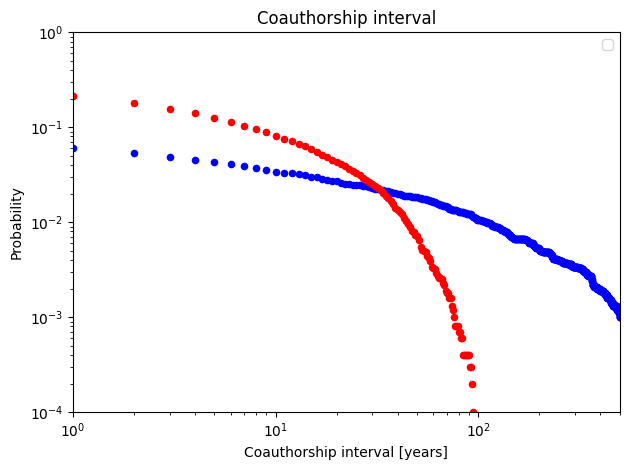

In [45]:
import pickle
import source.package.util as util

res = int_tasks
with open("./source/appendix/barabasi2005_censored", "rb") as fp:   # Unpickling
   res2 = pickle.load(fp)

# with open("", "wb") as fp:   #Pickling
#    pickle.dump(res, fp)
util.plotter(res,count="ccdf")
util.plotter(res2,count="ccdf",c="red")

plt.ylim(10**-4,1)
plt.xlim(1,5*10**2)
# plt.xscale("log")
# plt.yscale("log")
# plt.show()